# Exploratory data Analysis for the Haberman dataset

## Basic Information About the Data

* data is result of study conduted between the yeer 1958 abd 1970 at the university of chicago's Billings Hospital on the survival of patients who undergone for the breast cancer.
* contains 4 attributes
* where feature values are ages , Op_year , axil_nodes.
* target value is survival status of the patient.

## objective
* perform the analysis over the data
* get as many findings as possible.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
haberman = pd.read_csv('e:/data/haberman.csv')

In [44]:
print(haberman.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [45]:
print("Number of rows:",haberman.shape[0])
print("Number of columns:", haberman.shape[1])

Number of rows: 306
Number of columns: 4


In [46]:
print("Number of values\n" , haberman.status.value_counts())

print("Percentages\n" , haberman.status.value_counts()/len(haberman)*100)

Number of values
 1    225
2     81
Name: status, dtype: int64
Percentages
 1    73.529412
2    26.470588
Name: status, dtype: float64


**Observations**
* the data is imbalanced as number of 1's are greater than number of 2's

## Scatter Plot on the data

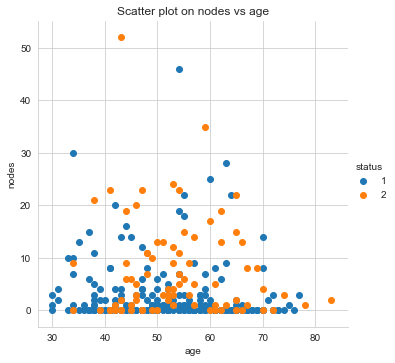

In [47]:
sns.FacetGrid(haberman, hue="status",height=5).map(plt.scatter, "age" , "nodes").add_legend();
plt.title('Scatter plot on nodes vs age')
plt.show()

## Pair Plot

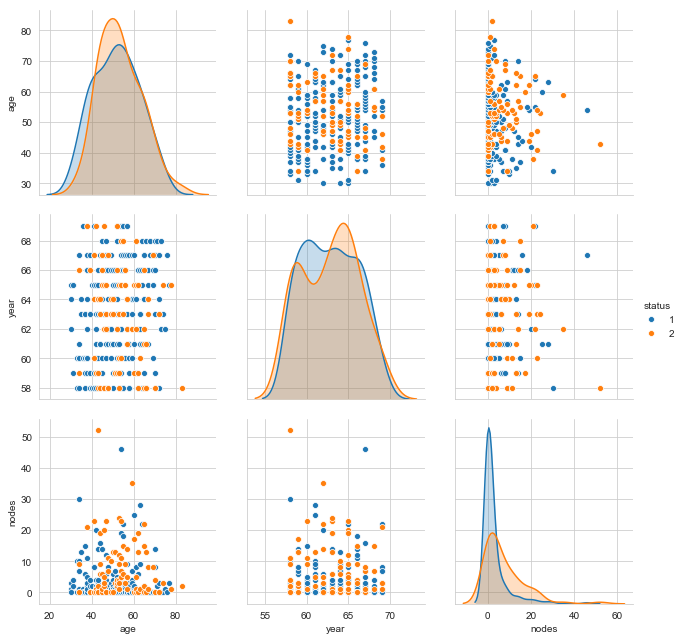

In [48]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3 , vars = ['age','year','nodes'])
plt.show()

## Histogram, PDF, CDF

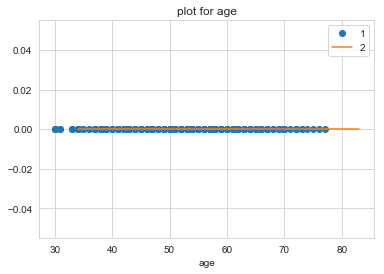

In [49]:
haberman_survived = haberman.age.loc[haberman.status == 1]
haberman_not_survived = haberman.age.loc[haberman.status == 2]
one = plt.plot( haberman_survived ,np.zeros_like(haberman_survived) , 'o' ,label = '1')
two = plt.plot(haberman_not_survived ,np.zeros_like(haberman_not_survived) , '-' , label = '2')
plt.xlabel('age')
plt.title('plot for age')
plt.legend()
plt.show()

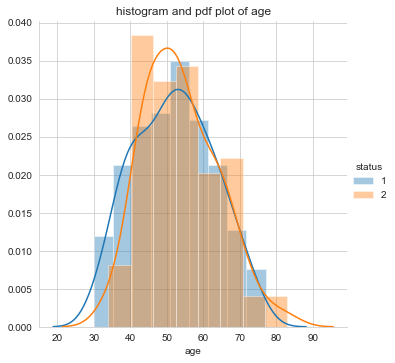

In [50]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('histogram and pdf plot of age')
plt.show();

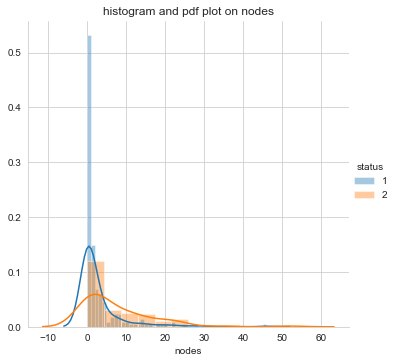

In [51]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('histogram and pdf plot on nodes')
plt.show();

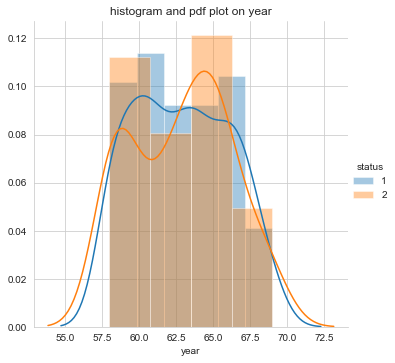

In [52]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('histogram and pdf plot on year')
plt.show();

**observations**
* from the above plot as the age increases the chances of survival goes down.
* as the number of nodes increases chances of survival goes down.
* from operation year 58 - 61 there are sligtly higher chance of survival.
* from operation year 63 - 66 there are slighly low chance of survival. 

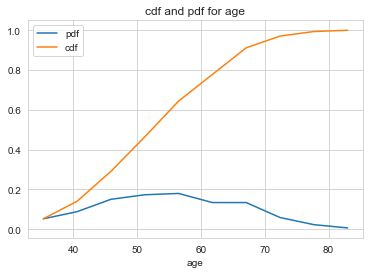

In [53]:
counts, parts = np.histogram(haberman.age, bins = 10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel('age')
plt.plot(parts[1:],pdf , label = 'pdf')
plt.plot(parts[1:], cdf ,label = 'cdf')
plt.title('cdf and pdf for age')
plt.legend()
plt.show()

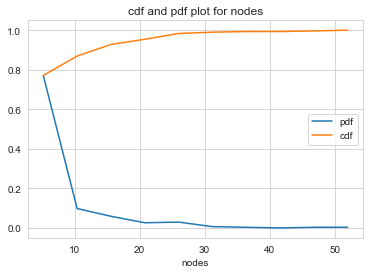

In [54]:
counts, parts = np.histogram(haberman.nodes, bins = 10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel('nodes')
plt.plot(parts[1:],pdf , label = 'pdf')
plt.plot(parts[1:], cdf , label = 'cdf')
plt.title('cdf and pdf plot for nodes')
plt.legend()
plt.show();

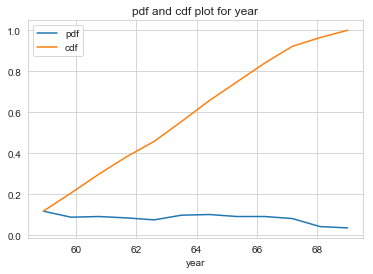

In [55]:
counts, parts = np.histogram(haberman.year, bins = 12)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel('year')
plt.plot(parts[1:],pdf , label = 'pdf')
plt.plot(parts[1:], cdf , label = 'cdf')
plt.legend()
plt.title('pdf and cdf plot for year')
plt.show()

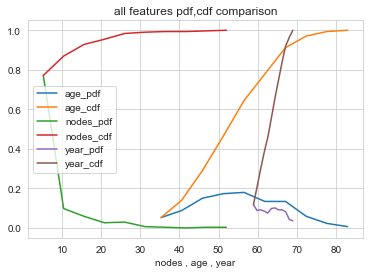

In [56]:
counts, parts = np.histogram(haberman.age, bins = 10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(parts[1:],pdf , label = 'age_pdf')
plt.plot(parts[1:], cdf , label = 'age_cdf')


counts, parts = np.histogram(haberman.nodes, bins = 10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(parts[1:],pdf , label = 'nodes_pdf')
plt.plot(parts[1:], cdf , label = 'nodes_cdf')

counts, parts = np.histogram(haberman.year, bins = 12)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.xlabel('nodes , age , year')
plt.plot(parts[1:],pdf , label = 'year_pdf' )
plt.plot(parts[1:], cdf , label = 'year_cdf')
plt.title('all features pdf,cdf comparison')
plt.legend()
plt.show();

# Median, Percentile, Quantile, IQR, MAD

In [57]:
print("\nMedians:")
print("age", np.median(haberman.age))
print("nodes:" , np.median(haberman.nodes))
print("Year:",np.median(haberman.year))


print("\nQuantiles:")
print("age:",np.percentile(haberman.age , [0,25,50,75]))
print("nodes:",np.percentile(haberman.nodes , [0,25,50,75]))
print("year:",np.percentile(haberman.year, [0,25,50,75]))

print("\n90th Percentiles:")
print("age:",np.percentile(haberman.age , 90))
print("nodes:",np.percentile(haberman.nodes , 90))
print("year:",np.percentile(haberman.year , 90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("age:",robust.mad(haberman.age))
print("nodes:",robust.mad(haberman.nodes))
print("year:",robust.mad(haberman.year))



Medians:
age 52.0
nodes: 1.0
Year: 63.0

Quantiles:
age: [30.   44.   52.   60.75]
nodes: [0. 0. 1. 4.]
year: [58.   60.   63.   65.75]

90th Percentiles:
age: 67.0
nodes: 13.0
year: 67.0

Median Absolute Deviation
age: 11.860817748044816
nodes: 1.482602218505602
year: 4.447806655516806


# Box plot and Whiskers

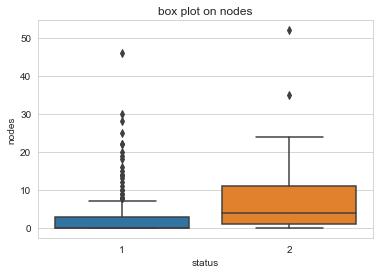

In [58]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('box plot on nodes')
plt.show()

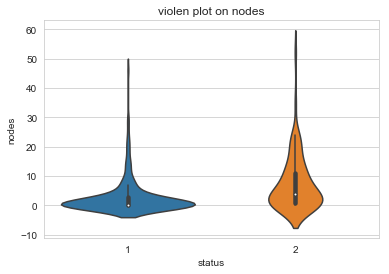

In [59]:
sns.violinplot(x="status", y="nodes", data=haberman)
plt.title('violen plot on nodes')
plt.show()

**Observations**
* as number of nodes increases chances of survival decreases.
* if a patient is having nodes close to 0 then it is having more chances of survival.